<a href="https://colab.research.google.com/github/The-SiranjeeviK-Company/learn-ml/blob/main/fcc_MAGIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

## Dataset:
Bock, R. (2004). MAGIC Gamma Telescope [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

   (c) Date received: May 2007

3. Past Usage:

   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,
       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,
       Vaicilius, A., Wittek W. (2004).
       Methods for multidimensional event classification: a case study
       using images from a Cherenkov gamma-ray telescope.
       Nucl.Instr.Meth. A, 516, pp. 511-528.

   (b) P. Savicky, E. Kotrc.
       Experimental Study of Leaf Confidences for Random Forest.
       Proceedings of COMPSTAT 2004, In: Computational Statistics.
       (Ed.: Antoch J.) - Heidelberg, Physica Verlag 2004, pp. 1767-1774.

   (c) J. Dvorak, P. Savicky.
       Softening Splits in Decision Trees Using Simulated Annealing.
       Proceedings of ICANNGA 2007, Warsaw, (Ed.: Beliczynski et. al),
       Part I, LNCS 4431, pp. 721-729.

4. Relevant Information:

   The data are MC generated (see below) to simulate registration of high energy
   gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the
   imaging technique. Cherenkov gamma telescope observes high energy gamma rays,
   taking advantage of the radiation emitted by charged particles produced
   inside the electromagnetic showers initiated by the gammas, and developing in the
   atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks
   through the atmosphere and gets recorded in the detector, allowing reconstruction
   of the shower parameters. The available information consists of pulses left by
   the incoming Cherenkov photons on the photomultiplier tubes, arranged in a
   plane, the camera. Depending on the energy of the primary gamma, a total of
   few hundreds to some 10000 Cherenkov photons get collected, in patterns
   (called the shower image), allowing to discriminate statistically those
   caused by primary gammas (signal) from the images of hadronic showers
   initiated by cosmic rays in the upper atmosphere (background).

   Typically, the image of a shower after some pre-processing is an elongated
   cluster. Its long axis is oriented towards the camera center if the shower axis
   is parallel to the telescope's optical axis, i.e. if the telescope axis is
   directed towards a point source. A principal component analysis is performed
   in the camera plane, which results in a correlation axis and defines an ellipse.
   If the depositions were distributed as a bivariate Gaussian, this would be
   an equidensity ellipse. The characteristic parameters of this ellipse
   (often called Hillas parameters) are among the image parameters that can be
   used for discrimination. The energy depositions are typically asymmetric
   along the major axis, and this asymmetry can also be used in discrimination.
   There are, in addition, further discriminating characteristics, like the
   extent of the cluster in the image plane, or the total sum of depositions.

   The data set was generated by a Monte Carlo program, Corsika, described in
      D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
      Forschungszentrum Karlsruhe FZKA 6019 (1998).
   The program was run with parameters allowing to observe events with energies down
   to below 50 GeV.

5. Number of Instances: 19020

6. Number of Attributes: 11 (including the class)

7. Attribute information:

    1.  fLength:  continuous  # major axis of ellipse [mm]
    2.  fWidth:   continuous  # minor axis of ellipse [mm]
    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm]
    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
   10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
   11.  class:    g,h         # gamma (signal), hadron (background)

8. Missing Attribute Values: None

9. Class Distribution:

   g = gamma (signal):     12332
   h = hadron (background): 6688

   For technical reasons, the number of h events is underestimated.
   In the real data, the h class represents the majority of the events.

   The simple classification accuracy is not meaningful for this data, since
   classifying a background event as signal is worse than classifying a signal
   event as background. For comparison of different classifiers an ROC curve
   has to be used. The relevant points on this curve are those, where the
   probability of accepting a background event as signal is below one of the
   following thresholds: 0.01, 0.02, 0.05, 0.1, 0.2 depending on the required
   quality of the sample of the accepted events for different experiments.


## Code

> Make sure to upload the `magic04.data` before excuting the below cells.

In [2]:
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names=col_names)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [4]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [5]:
# Lets convert the class into 0 or 1
df['class'] = (df['class']=='g').astype(int)

In [6]:
df['class'].unique()

array([1, 0])

## Short Note on Some Thoery

> Machine Learning is a **subdomain** of computer science that focuses on algorithms which help a **computer learn from data without explicit programming**.

> Artificial intelligence

> Data Science

- Supervised Learning
- Unsupervised Learning
- Reinforcement Learning

> Feature Vector (Input 1 to n) -> MODEL -> Output (Prediction)

> Qualitative Feature
- Nominal Data (No Inherent Order) eg., Countries - We use One Hot Encoding
- Ordinal Data (Inherent Order) eg., Age

> Quantitative Feature
- Continuous
- Discrete

### Supervised Learning Tasks

1. Classification - predict discrete classes
    - Multiclass
        - eg., Cat / Dog / Lizard / Dolphin
        - Plant Species
    - Binary
        - eg., +ve / -ve
        - Cat / Dog
        - Spam / Not Spam

2. Regression - predict continuous value
    - eg., Price Prediction

### L1 Loss

loss = sum( |y<sub>real</sub> - y<sub>predicted</sub>| )


$$ \text{L1 Loss} = \sum (|y_{\text{real}} - y_{\text{predicted}}|) $$


### L2 Loss

loss = sum ((|y<sub>real</sub> - y<sub>predicted</sub>|)<sup>2</sup>)

$$ \text{L2 Loss} = \sum ((|y_{\text{real}} - y_{\text{predicted}}|)^2) $$

> This is quadratic. If its close, the penalty is very minimal, if it's off by a lot, then the penalty is much higher.


### Cross-Entropy Loss

#### Binary Cross-Entropy Loss

$$ \text{Cross-Entropy Loss} = - \frac{1}{N} * \sum \left[ y_{\text{real}} * \log(y_{\text{predicted}}) + (1 - y_{\text{real}}) * \log(1 - y_{\text{predicted}}) \right] $$

## Code (Cont.)

In [7]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [8]:
df["class"]==0

,class
0,False
1,False
2,False
3,False
4,False
...,...
19015,True
19016,True
19017,True
19018,True


In [9]:
df[df["class"]==0]

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
12332,93.7035,37.9432,3.1454,0.1680,0.1011,53.2566,89.0566,11.8175,14.1224,231.9028,0
12333,102.0005,22.0017,3.3161,0.1064,0.0724,-54.0862,43.0553,-15.0647,88.4636,274.9392,0
12334,100.2775,21.8784,3.1100,0.3120,0.1446,-48.1834,57.6547,-9.6341,20.7848,346.4330,0
12335,91.6558,18.8293,2.7097,0.4386,0.3420,-52.6841,-97.8373,-17.0955,63.8834,130.7998,0
12336,38.0195,12.6736,2.8747,0.4084,0.1928,-51.4840,8.3471,7.9620,24.5402,163.8674,0
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


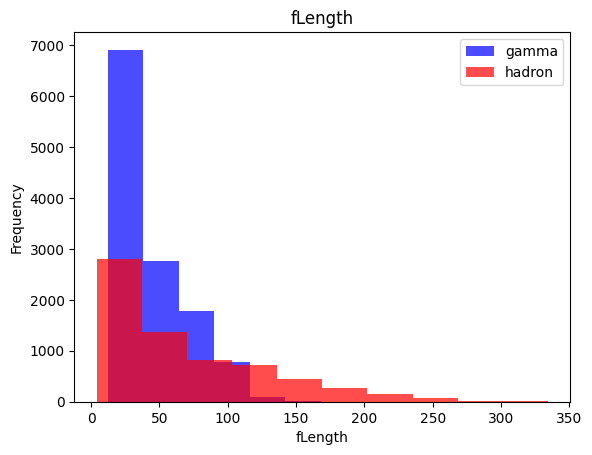

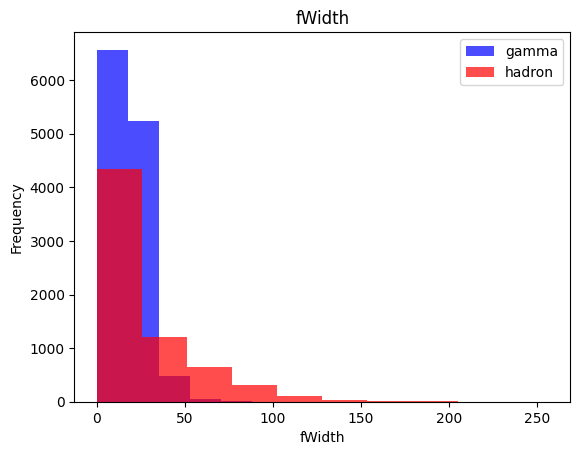

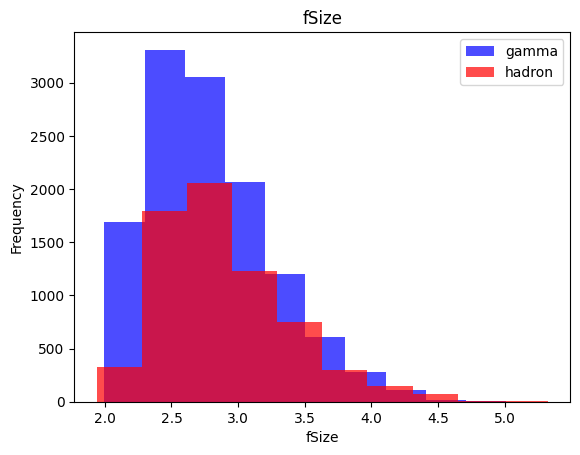

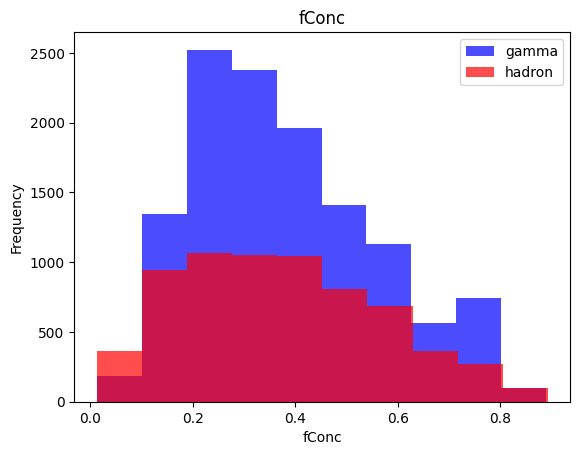

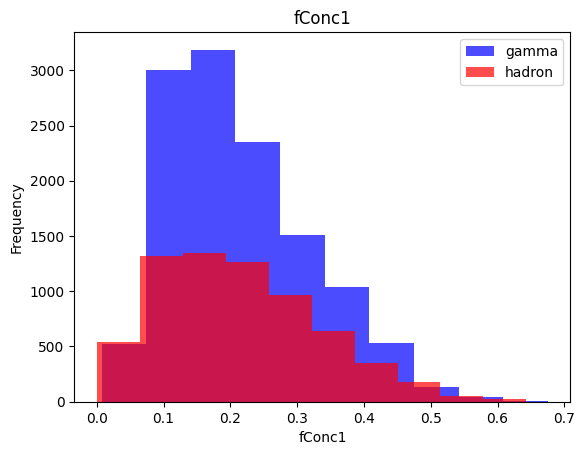

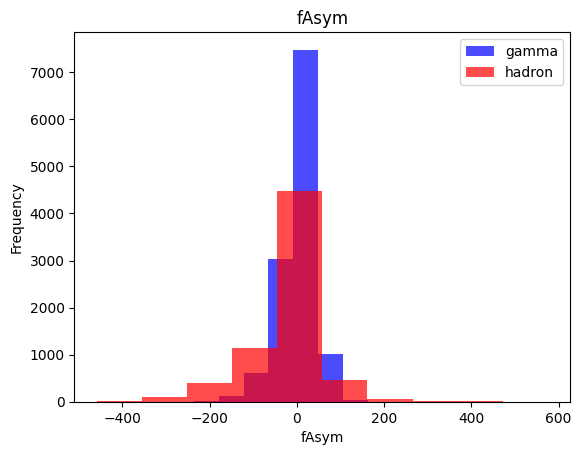

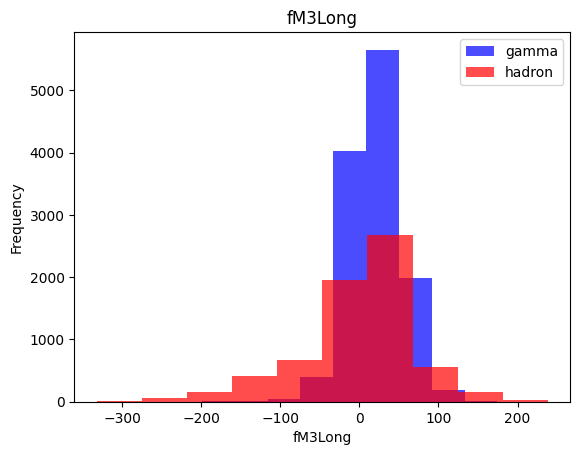

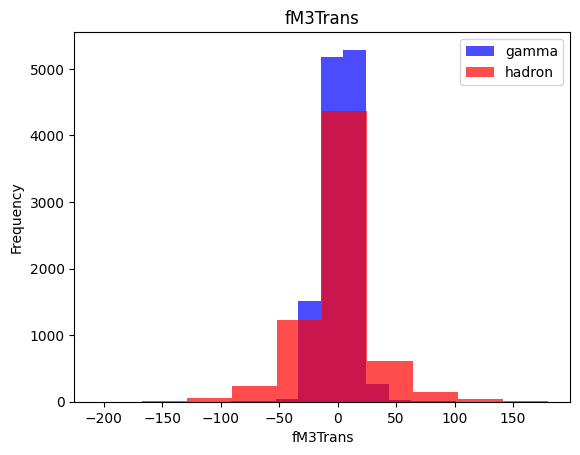

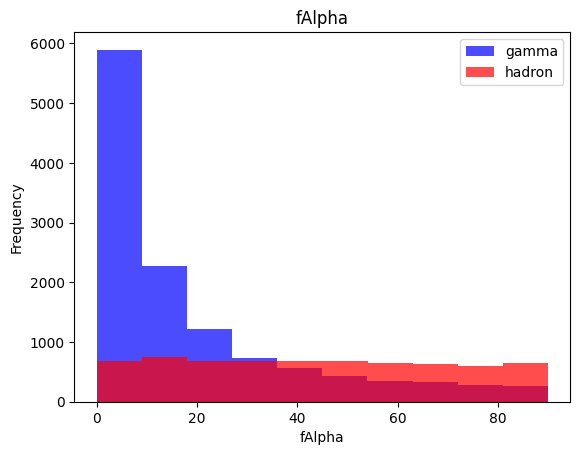

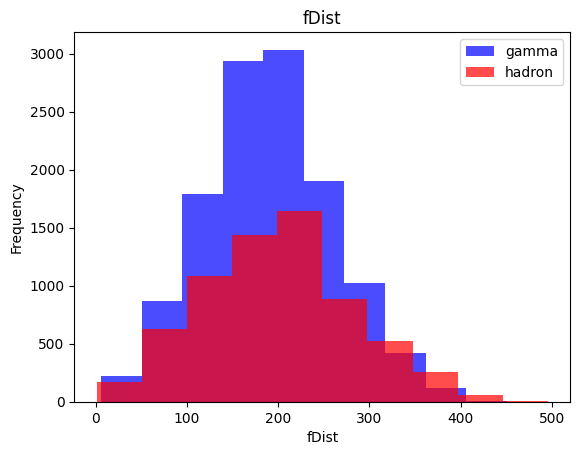

In [10]:
for label in col_names[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7)
  plt.title(label)
  plt.ylabel("Frequency")
  plt.xlabel(label)
  plt.legend()
  plt.show()


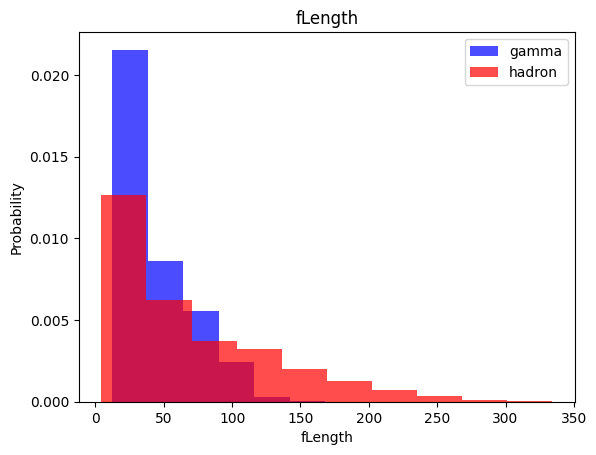

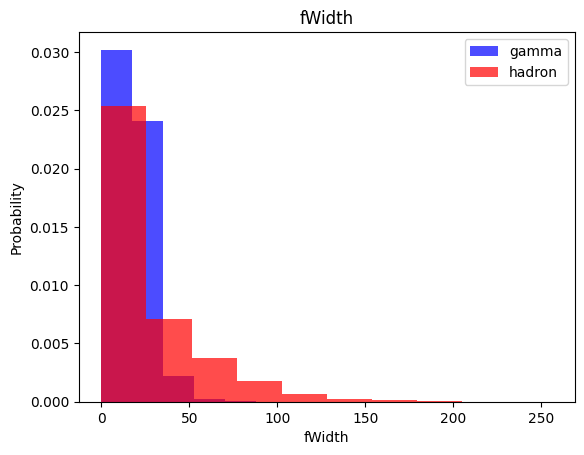

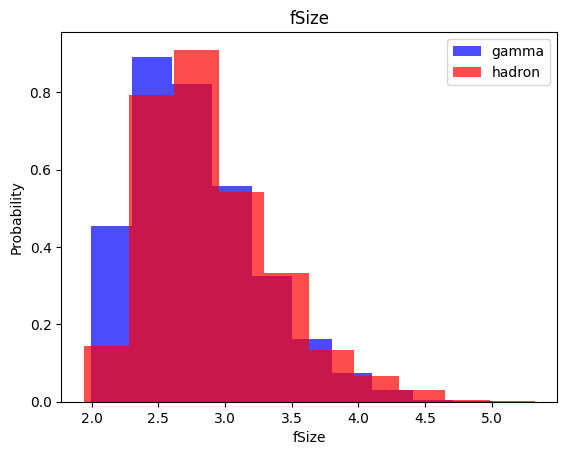

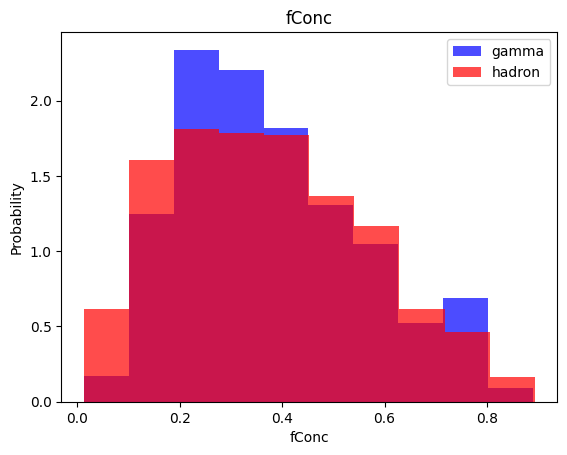

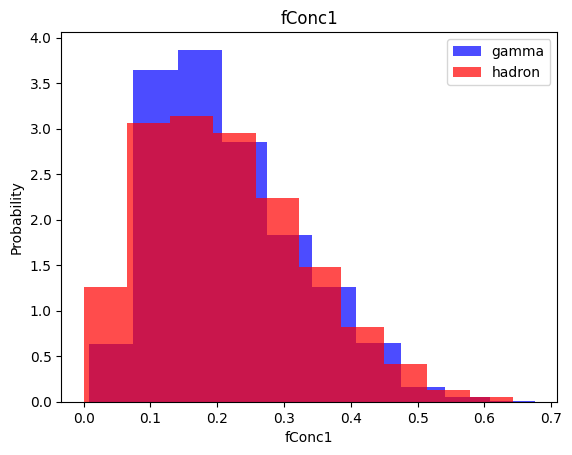

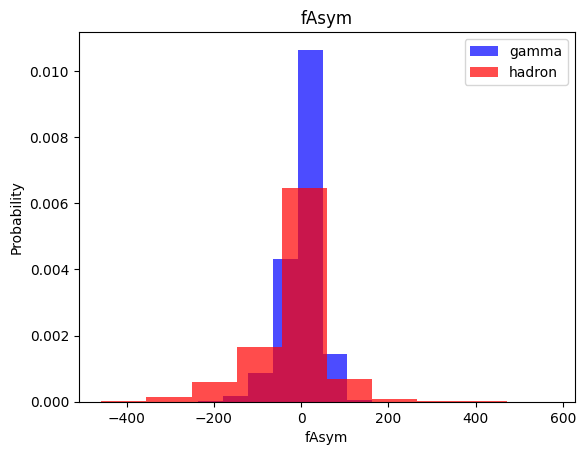

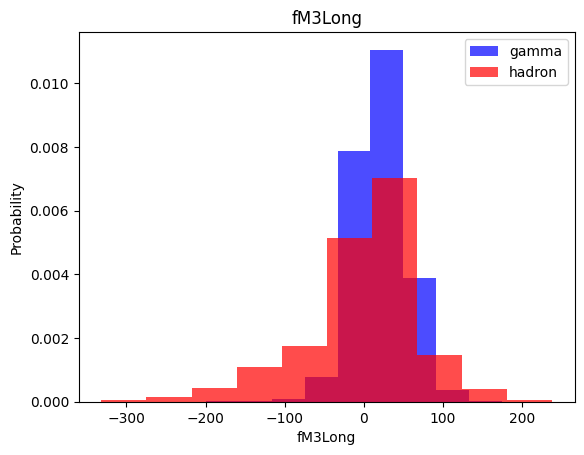

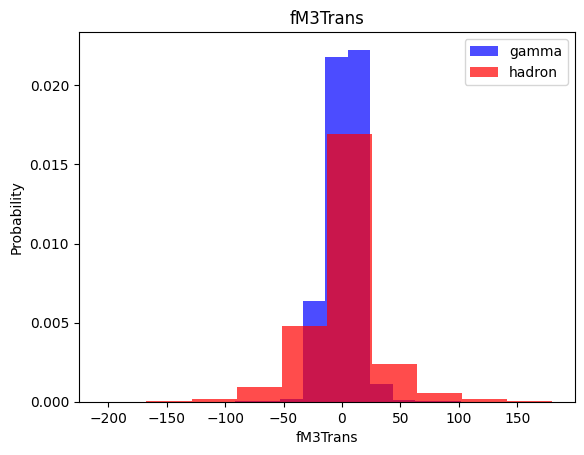

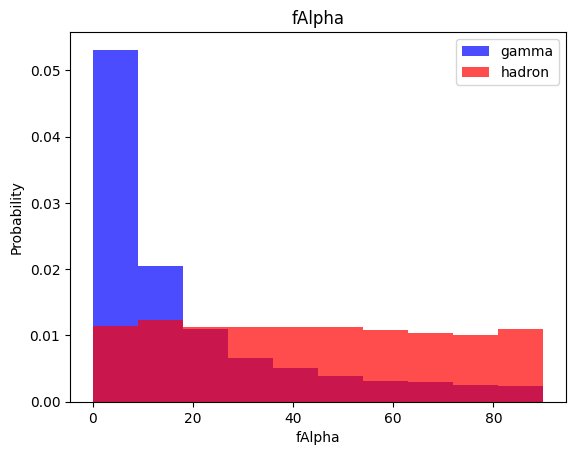

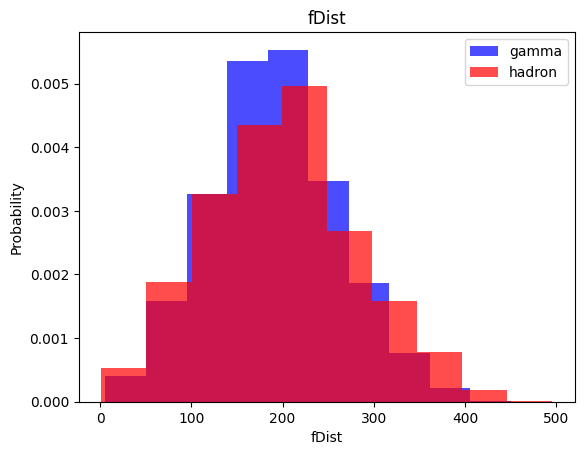

In [11]:
for label in col_names[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


NOTE: Check the histograms, you can see the difference in distribution (x-axis) in terms of `fLength`, `fWidth`, `fAsym`, `fAlpha` ...,

# Train, Validation, Test Datasets

## Preprocessing

In [12]:
# Lets shuffle the data
shuffled_df = df.sample(frac=1)

In [13]:
shuffled_df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
10944,74.9198,34.1336,3.2011,0.1259,0.0645,-24.0116,-24.0401,29.2437,15.5248,238.6830,1
9253,34.8629,20.5725,3.1017,0.2809,0.1404,39.1696,26.9348,-9.6520,14.1610,91.5397,1
18403,65.7025,11.3238,2.9690,0.2689,0.1770,62.4519,54.5793,-8.0689,21.3627,240.5631,0
7281,13.0312,11.0411,2.1508,0.7562,0.4346,14.4059,-5.8704,10.8163,18.0390,239.1120,1
9936,36.8172,15.6980,2.6123,0.3126,0.1746,27.1143,19.0649,9.4098,22.2590,182.5500,1


In [14]:
print(df.columns[:-1]) # X (array of column names except last)
print(df.columns[-1:]) # array with just last column name
print(df.columns[-1]) # y (last column name)

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist'],
      dtype='object')
Index(['class'], dtype='object')
class


In [15]:
def scale_dataset(dataframe:pd.DataFrame, oversample:bool=False) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
  """Preprocesses a Pandas DataFrame for machine learning.

  This function performs the following steps:

  1. Separates features (X) and target variable (y) from the DataFrame.
  2. Scales the features using StandardScaler to have zero mean and unit variance.
  3. Optionally oversamples the minority class using RandomOverSampler to balance the dataset.
  4. Recombines the scaled features and target variable into a single NumPy array.

  Args:
    dataframe: The input Pandas DataFrame containing features and target variable.
    oversample: A boolean flag indicating whether to perform oversampling (default is False).

  Returns:
    A tuple containing:
      - data: A NumPy array representing the preprocessed dataset, including scaled features and target variable.
      - X: A NumPy array representing the scaled features.
      - y: A NumPy array representing the target variable.
  """

  # `dataframe.columns[:-1]` used to select all column except last one column
  X = dataframe[dataframe.columns[:-1]].values # `.values` gives the array of values leaving labels or column name (so, 2D array)
  y = dataframe[dataframe.columns[-1]].values # just last column (so, 1D array)

  scaler = StandardScaler()

  # Scaled X
  X = scaler.fit_transform(X) # Refer the below docs for more info (.fit_transform() is used to calculate the parameters (mean and standard deviation) and scale based on it).

  # No need to scale y

  # TODO: Like we did with oversample, we may need to control fit_transform as well. Since we just transform() test data instead of fit_transform()

  if oversample:
    # Oversampling
    ros = RandomOverSampler() # Refer below docs
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1)))) # -1 is a special placeholder used in np.reshape()

  return data, X, y




> Using -1 in np.reshape(-1, 1) allows you to reshape an array conveniently by automatically determining the necessary dimension size based on the total number of elements. This makes your code more flexible and easier to manage.



[Standard Scaler](#standard-scaler)

[How `RandomOverSampler` works?](#how-randomoversampler-works)

In [16]:
# Lets Split
# train, valid, test = np.split(shuffled_df, [int(0.6*len(df)), int(0.8*len(df))])
# print(f"Train Shape: {train.shape}")
# print(f"Val Shape: {valid.shape}")
# print(f"Test Shape: {test.shape}")

# Lets Scale (without oversampling)

# train, X_train, y_train = scale_dataset(train)
# print("Without Oversampling")
# print("X Train Shape", X_train.shape)
# print("y Train Shape", y_train.shape)
# print(f"In y Train, no of 0s: {np.count_nonzero(y_train==0)}")
# print(f"In y Train, no of 1s: {np.count_nonzero(y_train==1)}")
# print("This will leads to model biased towards Majority Class")

In [17]:
# Let's split
train, valid, test = np.split(shuffled_df, [int(0.6*len(df)), int(0.8*len(df))])
print("Splited:")
print(f"Train Shape: {train.shape}")
print(f"Val Shape: {valid.shape}")
print(f"Test Shape: {test.shape}")


# Lets Scale with oversampling

# train
train, X_train, y_train = scale_dataset(train, oversample=True)
print("\nWith Oversampling")
print("\nTrain")
print("X Train Shape", X_train.shape)
print("y Train Shape", y_train.shape)
print(f"In y Train, no of 0s: {np.count_nonzero(y_train==0)}")
print(f"In y Train, no of 1s: {np.count_nonzero(y_train==1)}")
# This will prevent model trained from being biased with Majority class, since now both are equal no.


# We don't oversample the validation and test data (since Real world data are like that and we wanna test ouu model if it can work there)
test, X_test, y_test = scale_dataset(test, oversample=False)
print("\nTest")
print("X Test Shape", X_test.shape)
print("y Test Shape", y_test.shape)

valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
print("\nValid")
print("X Valid Shape", X_valid.shape)
print("y Valid Shape", y_valid.shape)

Splited:
Train Shape: (11412, 11)
Val Shape: (3804, 11)
Test Shape: (3804, 11)

With Oversampling

Train
X Train Shape (14792, 10)
y Train Shape (14792,)
In y Train, no of 0s: 7396
In y Train, no of 1s: 7396

Test
X Test Shape (3804, 10)
y Test Shape (3804,)

Valid
X Valid Shape (3804, 10)
y Valid Shape (3804,)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


## K Nearest Neighbour

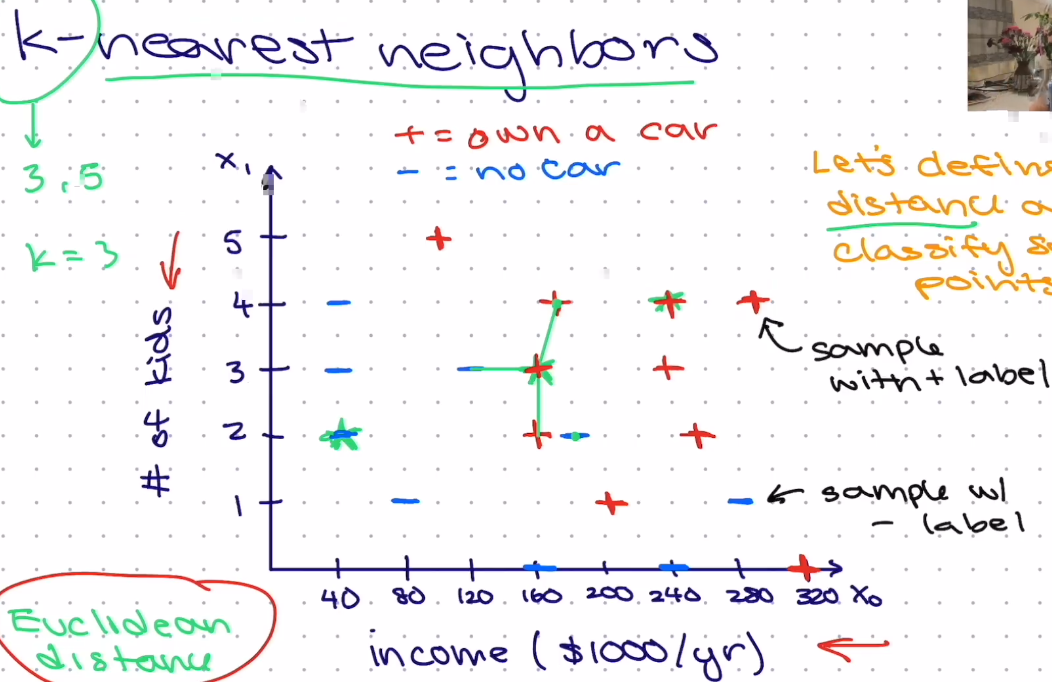

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
y_pred = knn_model.predict(X_test)

In [21]:
y_pred, y_test

(array([0, 0, 0, ..., 1, 1, 1]), array([1, 0, 0, ..., 0, 1, 1]))

## Evaluation

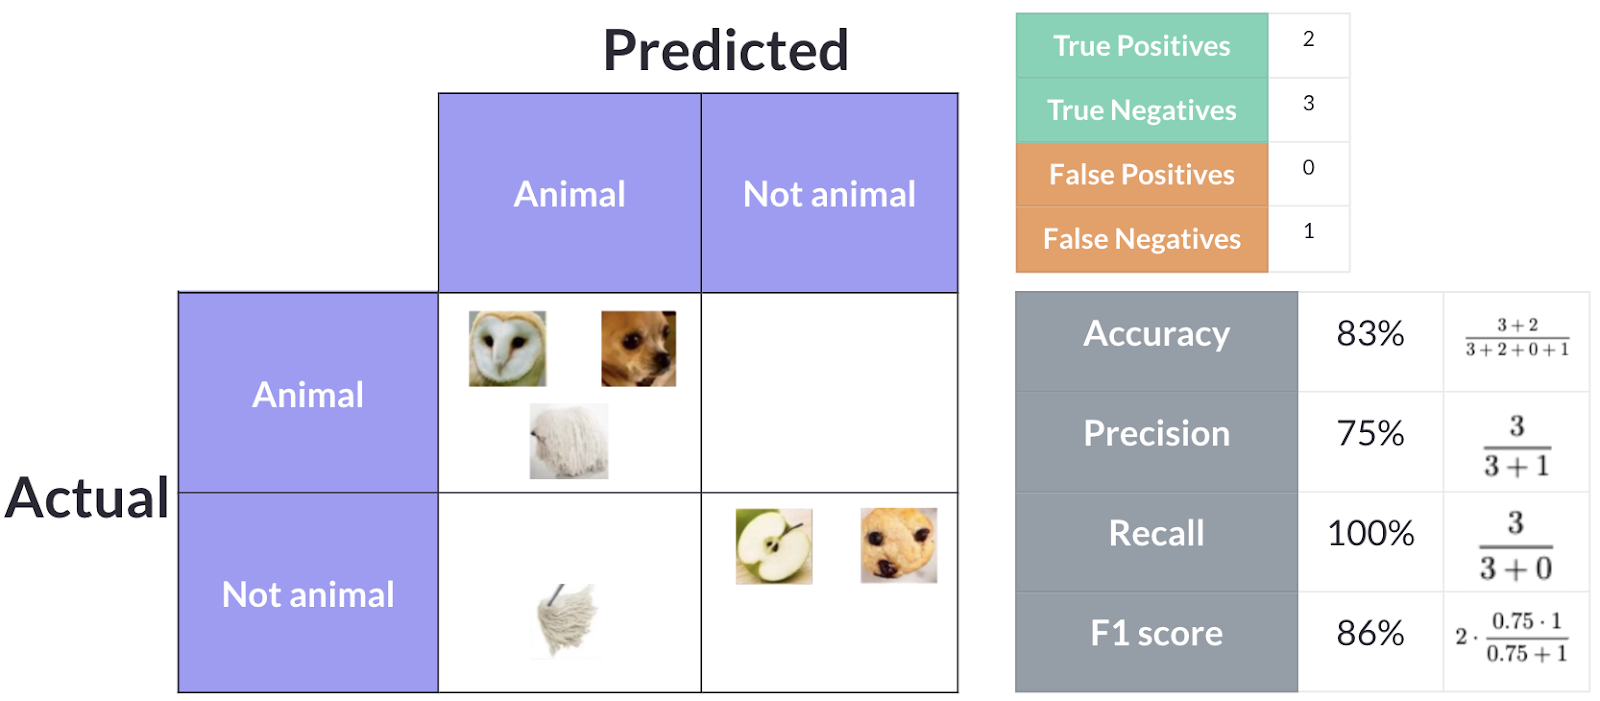

### **Accuracy, Precision, Recall and F1 Score**

| **Metric**     | **Definition**                                                                                  | **Formula (refer below for abbreviation)**                                  | **When to Use**                                                                                              |
|----------------|-------------------------------------------------------------------------------------------------|----------------------------------------------|--------------------------------------------------------------------------------------------------------------|
| **Accuracy**   | The ratio of correctly predicted observations to the total observations.                       | $$\begin{equation}\frac{TP + TN}{TP + TN + FP + FN}\end{equation}$$    | Use when all classes are equally important.                                                                  |
| **Precision**  | The ratio of correctly predicted positive observations to the total predicted positives.       | $$\frac{TP}{TP + FP}$$                       | Use when the cost of false positives is high (e.g., spam detection).                                         |
| **Recall**     | The ratio of correctly predicted positive observations to all actual positives.                | $$\frac{TP}{TP + FN}$$                       | Use when the cost of false negatives is high (e.g., disease detection).                                      |
| **F1 Score**   | The weighted average of Precision and Recall.                                                  | $$2 \times \frac{Precision \times Recall}{Precision + Recall}$$ | Use when you need a balance between Precision and Recall, and when there is an uneven class distribution. |

### **Explanation of Terms:**
- **TP (True Positive):** Correctly predicted positive observations.
- **TN (True Negative):** Correctly predicted negative observations.
- **FP (False Positive):** Incorrectly predicted positive observations.
- **FN (False Negative):** Incorrectly predicted negative observations.

These metrics are critical for evaluating the performance of classification models, especially in imbalanced datasets where accuracy alone can be misleading.

---



In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test, y_pred)) # (k=5)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1348
           1       0.85      0.85      0.85      2456

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



> The Classification report evaluation not only changes when the value of k changes, it can also based on shuffle df. When we shuffle the df, distribution between the train and test set changes which leads to different training data for each shuffle and different evaluation as well.

---

# Bayes Rule

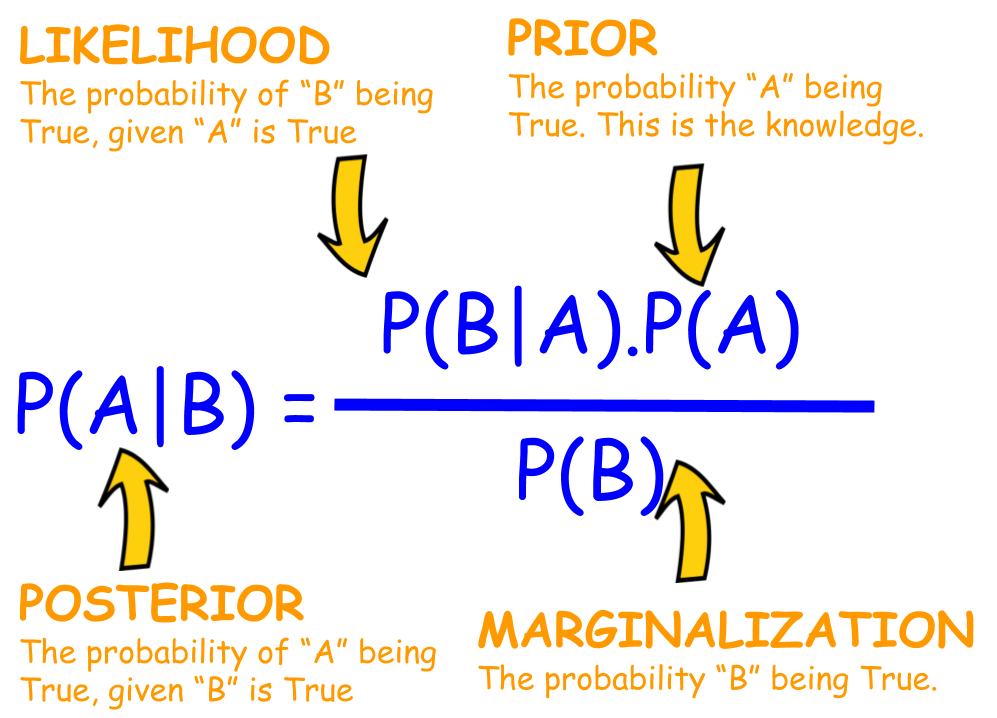

> Can perform poorly if the assumption of independence is violated

# Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [26]:
y_pred = nb_model.predict(X_test)

In [27]:
y_pred, y_test

(array([1, 0, 0, ..., 1, 1, 1]), array([1, 0, 0, ..., 0, 1, 1]))

### Evaluation

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.39      0.50      1348
           1       0.73      0.90      0.81      2456

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.72      0.72      0.70      3804



# Logistic regression

Logistic regression is used for binary classification problems. It predicts the probability that a given instance belongs to a particular class. The formula involves a linear combination of the input features, followed by applying the sigmoid (logistic) function to map the output to a probability:

$$ \text{logit}(p) = \ln\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n $$

Where:
- \( p \) is the probability that the instance belongs to the positive class.


Uses Sigmoid function
  - $$ \sigma (z) = \frac{1}{1+e^{-z}}$$
  - The sigmoid function, or logistic function, is used to map any real-valued number into the [0, 1] interval, making it suitable for probability estimation.
  - to map $$ - \infty \text{ to } \infty$$ into $$ 0 \text{ to } 1$$

Two Types,

- Simple Logistic Regression

- Multiple Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [31]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1348
           1       0.85      0.82      0.84      2456

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Support Vector Machine

### Basic Concept
The core idea behind SVM is to find the optimal hyperplane that best separates the data points of different classes. This *hyperplane maximizes the margin* between the closest points (support vectors) of the classes.

### Key Concepts
1. **Hyperplane:**
   In an n-dimensional space, a hyperplane is a flat affine subspace of dimension (n-1) that separates the data points into different classes. For a 2D space, the hyperplane is a line; for a 3D space, it's a plane.

2. **Support Vectors:**
   These are the data points that lie closest to the hyperplane. They play a crucial role in defining the position and orientation of the hyperplane.

3. **Margin:**
   The margin is the distance between the hyperplane and the nearest data point from either class. SVM aims to maximize this margin.

### Linear SVM
For linearly separable data, SVM finds the optimal hyperplane that separates the data with the maximum margin.

### Non-Linear SVM
For non-linearly separable data, SVM uses a technique called the **kernel trick** to transform the original feature space into a higher-dimensional space where a hyperplane can effectively separate the data.

### Kernel Functions
Commonly used kernel functions include:
- **Linear Kernel:** $$ K(x_i, x_j) = x_i \cdot x_j $$
- **Polynomial Kernel:** $$ K(x_i, x_j) = (\gamma x_i \cdot x_j + r)^d $$
- **Radial Basis Function (RBF) Kernel:** $$ K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2) $$
- **Sigmoid Kernel:** $$ K(x_i, x_j) = \tanh(\gamma x_i \cdot x_j + r) $$

### Mathematical Formulation
The optimization problem for SVM can be expressed as:

Maximize the margin:
$$
\text{maximize} \quad \frac{1}{2} \|w\|^2
$$
Subject to:
$$
y_i (w \cdot x_i + b) \geq 1 \quad \text{for all } i
$$
Where:
- $$ w $$ is the weight vector
- $$ b $$ is the bias term
- $$ x_i $$ are the feature vectors
- $$ y_i $$ are the class labels (1 or -1)

### Advantages of SVM
- Effective in high-dimensional spaces
- Memory efficient, as it uses a subset of training points (support vectors)
- Versatile with the use of different kernel functions

### Disadvantages of SVM
- Can be computationally intensive for large datasets
- Sensitive to the choice of kernel parameters and regularization term

### Applications of SVM
- Text classification
- Image recognition
- Bioinformatics (e.g., protein classification)
- Handwriting recognition

### Example
Imagine classifying data points in a 2D space:

- Class A: $$ \{(1, 2), (2, 3), (3, 3)\} $$
- Class B: $$ \{(6, 6), (7, 7), (8, 6)\} $$

An SVM would find the optimal line (hyperplane) separating these two classes with the maximum margin.

> These SVMs are sensitive to outliers. This is a major disadvantage

---
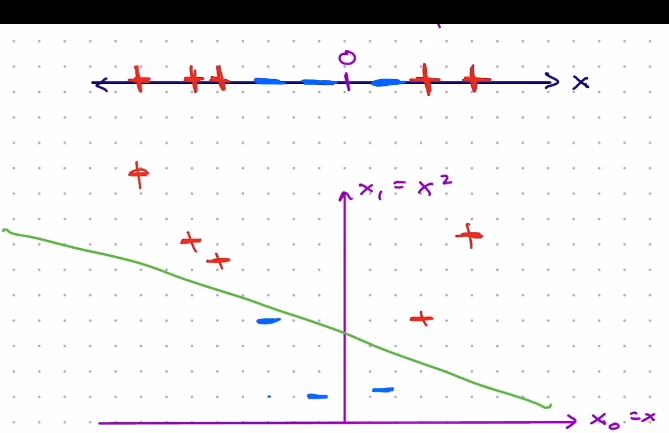
> We can scale an axis in SVM to find tricky hyperplane, this is known as ***Kernal Trick***

In [32]:
from sklearn.svm import SVC

In [33]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [34]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1348
           1       0.89      0.91      0.90      2456

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



> So far, this shows the best result.

# Neural Network

In [35]:
import tensorflow as tf

In [36]:
# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [37]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [38]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
nn_model.compile(optimizer= tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7432 - loss: 0.5375 - val_accuracy: 0.6796 - val_loss: 0.5811
Epoch 2/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8308 - loss: 0.3898 - val_accuracy: 0.6948 - val_loss: 0.5632
Epoch 3/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8426 - loss: 0.3695 - val_accuracy: 0.7415 - val_loss: 0.5012
Epoch 4/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8549 - loss: 0.3450 - val_accuracy: 0.7337 - val_loss: 0.5410
Epoch 5/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8585 - loss: 0.3425 - val_accuracy: 0.7601 - val_loss: 0.4782
Epoch 6/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8596 - loss: 0.3299 - val_accuracy: 0.7263 - val_loss: 0.5373
Epoch 7/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8625 - loss: 0.3304 - val_accuracy: 0.7178 - val_loss: 0.5556
Epoch 8/100
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8597 - loss: 0.3321 - v

> CPU runtime took 4 mins 11 secs

> Not sure, the T4 GPU took 8 mins

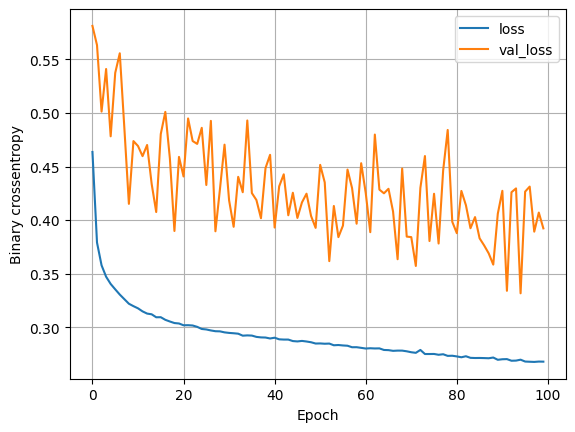

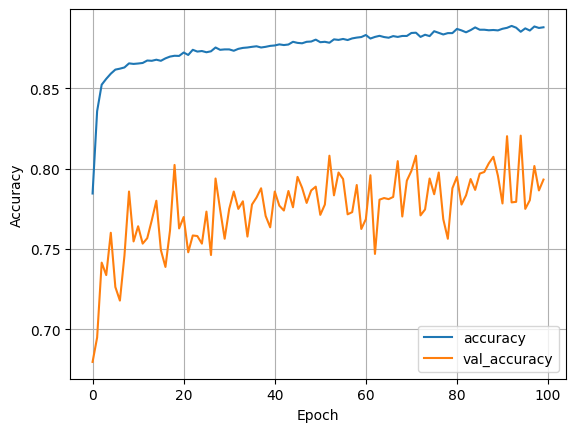

In [41]:
plot_loss(history)
plot_accuracy(history)

# BIG DOCS


## Standard Scaler
The **StandardScaler** is a tool in Scikit-learn that standardizes features in your dataset by scaling them to have a mean of 0 and a standard deviation of 1.

#### **Why We Use It:**
- **Equal Contribution:** Ensures all features contribute equally to the model, preventing features with larger scales from dominating.
- **Improved Performance:** Many machine learning algorithms perform better and converge faster when the data is standardized.
- **Consistency:** Provides a uniform scale for data, which is essential for algorithms sensitive to the scale of input features, like K-Nearest Neighbors or SVM.

#### **How It Works:**
1. **Calculates the Mean and Standard Deviation** for each feature in your dataset.
2. **Transforms the Data** by subtracting the mean and dividing by the standard deviation.

#### **Example:**
If you have a feature with values [10, 20, 30], a mean of 20, and a standard deviation of 10, it will transform these values to [-1.0, 0.0, 1.0].

---

#### Usage of StandardScaler
Using the **StandardScaler** ensures that your dataset is on a consistent scale, making your machine learning models more accurate and efficient.

##### **1. fit(X, y=None):**
- **Purpose:** Computes the mean and standard deviation for scaling.
- **Usage:** This method is used to calculate the parameters (mean and standard deviation) based on the training data.
- **Example:**
  ```python
  scaler = StandardScaler()
  scaler.fit(X_train)
  ```

##### **2. transform(X):**
- **Purpose:** Transforms the data using the mean and standard deviation computed by the `fit` method.
- **Usage:** This method is used to scale the data based on the learned parameters.
- **Example:**
  ```python
  X_train_scaled = scaler.transform(X_train)
  ```

##### **3. fit_transform(X, y=None):**
- **Purpose:** Combines `fit` and `transform` in a single step.
- **Usage:** This method is a convenient way to fit the scaler on the data and then transform it.
- **Example:**
  ```python
  X_train_scaled = scaler.fit_transform(X_train)
  ```

##### **4. inverse_transform(X):**
- **Purpose:** Reverts the scaled data back to the original scale.
- **Usage:** This method is used when you need to convert the standardized data back to its original form.
- **Example:**
  ```python
  X_original = scaler.inverse_transform(X_train_scaled)
  ```

##### **5. partial_fit(X, y=None):**
- **Purpose:** Updates the mean and standard deviation with a subset of the data.
- **Usage:** This method is useful for online learning or when you have large datasets that do not fit into memory.
- **Example:**
  ```python
  scaler = StandardScaler()
  scaler.partial_fit(X_batch)
  ```

##### **6. get_params(deep=True):**
- **Purpose:** Returns the parameters for the estimator.
- **Usage:** This method can be used to get the parameters that were used by the scaler.
- **Example:**
  ```python
  params = scaler.get_params()
  print(params)
  ```

##### **7. set_params(**params):**
- **Purpose:** Sets the parameters for the estimator.
- **Usage:** This method can be used to set or update the parameters of the scaler.
- **Example:**
  ```python
  scaler.set_params(copy=False)
  ```

##### **8. mean_:**
- **Purpose:** The mean value for each feature in the training set.
- **Usage:** This attribute stores the mean values calculated during the `fit` method.
- **Example:**
  ```python
  mean_values = scaler.mean_
  print(mean_values)
  ```

##### **9. scale_:**
- **Purpose:** The scaling factor (standard deviation) for each feature in the training set.
- **Usage:** This attribute stores the standard deviation values calculated during the `fit` method.
- **Example:**
  ```python
  scale_values = scaler.scale_
  print(scale_values)
  ```

##### **10. var_:**
- **Purpose:** The variance for each feature in the training set.
- **Usage:** This attribute stores the variance values calculated during the `fit` method.
- **Example:**
  ```python
  var_values = scaler.var_
  print(var_values)
  ```

##### **11. n_samples_seen_:**
- **Purpose:** The number of samples processed by the `fit` or `partial_fit` methods.
- **Usage:** This attribute keeps track of the number of samples seen by the scaler.
- **Example:**
  ```python
  samples_seen = scaler.n_samples_seen_
  print(samples_seen)
  ```

#### **Example of Using Multiple Methods:**
Here’s a complete example that incorporates several methods:
```python
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Sample DataFrame
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [10, 20, 30, 40, 50]
}
df = pd.DataFrame(data)

# Split the data into training and testing sets
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Access mean and scale attributes
mean_values = scaler.mean_
scale_values = scaler.scale_

print("Mean values:", mean_values)
print("Scale values:", scale_values)

# Inverse transform to get back to original data
X_train_original = scaler.inverse_transform(X_train_scaled)
print("Original Training Data:")
print(X_train_original)
```

---

## How RandomOverSampler Works
  **RandomOverSampler** works by randomly duplicating samples from the minority class until the classes are balanced. This means it creates new instances of the minority class by simply copying existing ones, which ensures that the model sees enough examples of the minority class during training.

  #### **Alternatives to RandomOverSampler:**

  1. **SMOTE (Synthetic Minority Over-sampling Technique):**
   - **How It Works:** SMOTE generates synthetic samples for the minority class by interpolating between existing minority samples. It creates new samples by randomly choosing points along the line segments between minority class instances.
   - **Pros:** Reduces the risk of overfitting compared to simple random oversampling.
   - **Cons:** May introduce noise if not carefully applied.

   ```python
   from imblearn.over_sampling import SMOTE
   smote = SMOTE(random_state=42)
   X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
   ```

  2. **ADASYN (Adaptive Synthetic Sampling):**
   - **How It Works:** Similar to SMOTE but focuses more on creating synthetic samples for minority class instances that are harder to learn.
   - **Pros:** Addresses class imbalance more effectively by generating more samples for harder-to-learn areas.
   - **Cons:** Can be more complex and computationally expensive.

  3. **RandomUnderSampler:**
   - **How It Works:** Randomly removes samples from the majority class until the dataset is balanced.
   - **Pros:** Simple to implement, reduces the dataset size, which can speed up training.
   - **Cons:** May lose potentially important information from the majority class.

   ```python
   from imblearn.under_sampling import RandomUnderSampler
   rus = RandomUnderSampler(random_state=42)
   X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
   ```

  4. **BalancedBaggingClassifier:**
   - **How It Works:** Uses balanced bagging to create an ensemble of balanced datasets for training.
   - **Pros:** Combines the benefits of bagging with balanced datasets.
   - **Cons:** More complex and computationally intensive.

   ```python
   from imblearn.ensemble import BalancedBaggingClassifier
   from sklearn.tree import DecisionTreeClassifier
   bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)
   bbc.fit(X_train, y_train)
   ```

  #### **Model Bias with Imbalanced Classes:**
  Most machine learning models can become biased when dealing with imbalanced datasets because they tend to favor the majority class. This can lead to poor performance on the minority class, often resulting in lower recall and precision for that class. Here are a few reasons why this happens:

  1. **Learning Bias:** Models learn the patterns of the majority class more effectively due to the larger number of examples, neglecting the minority class.
  2. **Performance Metrics:** Accuracy can be misleading with imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but 0% recall for the minority class.
  3. **Optimization Algorithms:** Some algorithms, like gradient descent, can be affected by imbalanced datasets as they might converge to a biased solution.

  #### **Addressing Imbalance:**
  Using resampling techniques like those mentioned above, adjusting class weights, and choosing the right performance metrics (such as F1 score, ROC-AUC, Precision-Recall curves) are essential steps to mitigate the effects of class imbalance and build more robust models.

### **K-Nearest Neighbors (KNN) Algorithm**

K-Nearest Neighbors (KNN) is a simple, yet powerful, machine learning algorithm used for both classification and regression tasks. It is a **lazy learning algorithm**, meaning it doesn't learn a discriminative function from the training data but memorizes the training dataset instead.

### **How KNN Works:**
1. **Training Phase:** KNN does not have an explicit training phase. It simply stores the training data.
2. **Prediction Phase:**
   - For a given test point, the algorithm finds the K nearest neighbors (data points) from the training data.
   - The distance between the test point and the neighbors is typically calculated using Euclidean distance, but other distance metrics like Manhattan, Minkowski, or Hamming distance can also be used.
   - In **classification**, the test point is assigned the class label that is most frequent among the K nearest neighbors (majority vote).
   - In **regression**, the test point is assigned the average value of the K nearest neighbors.

### **Key Components:**
- **Number of Neighbors (K):** The number of nearest neighbors to consider. A larger K reduces the effect of noise but may cause bias. A smaller K is more sensitive to noise but can capture the local structure better.
- **Distance Metric:** Defines how the distance between points is calculated. Common metrics include:
  - **Euclidean Distance:**
  $$ \sqrt{\sum (x_i - y_i)^2} $$
  - **Manhattan Distance:** $$ \sum |x_i - y_i| $$
  - **Minkowski Distance:** Generalization of Euclidean and Manhattan distances.
  - **Hamming Distance:** Used for categorical variables.

### **Advantages:**
- **Simple to Understand and Implement:** KNN is easy to grasp and implement.
- **No Training Phase:** Makes it easy to update with new data.
- **Versatile:** Can be used for classification and regression.

### **Disadvantages:**
- **Computationally Intensive:** Requires storing and comparing all training data during prediction.
- **Sensitive to Irrelevant Features:** Performance can degrade with irrelevant features.
- **Curse of Dimensionality:** Performance decreases with high-dimensional data due to the sparsity of data points.

### **Example Using Scikit-learn:**
Here’s a simple example of using KNN for classification with Scikit-learn:
```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Sample DataFrame
data = {
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'class': [0, 0, 0, 0, 0, 1, 0, 0, 0, 1]  # Imbalanced dataset
}

df = pd.DataFrame(data)
X = df.drop('class', axis=1)
y = df['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the data (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier on the training data
knn.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = knn.predict(X_test_scaled)

# Evaluate the classifier
print(classification_report(y_test, y_pred))
```

### **Hyperparameter Tuning:**
Choosing the right value of K and the distance metric can significantly impact the performance of the KNN algorithm. This can be done using techniques like **Grid Search** or **Cross-Validation**.